## Graph Visualization

* Load a graph database of your choosing from a text file or other source.
If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection),
please feel free at this point to load just a small subset of the nodes and edges.
Create basic analysis on the graph, including the graph’s diameter,
and at least one other metric of your choosing.
* You may either code the functions by hand (to build your intuition and insight),
or use functions in an existing package.
Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
* Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

## Using Cypher ( neo4j)

In [12]:
from neo4j import GraphDatabase

In [8]:
class Neo4jConnection:

    def __init__(self, uri, user, pwd):

        self.__uri = uri
        self.__user = user
        self.__pwd = pwd
        self.__driver = None

        try:
            self.__driver = GraphDatabase.driver(self.__uri, auth=(self.__user, self.__pwd))
        except Exception as e:
            print("Failed to create the driver:", e)

    def close(self):

        if self.__driver is not None:
            self.__driver.close()

    def query(self, query, parameters=None, db=None):

        assert self.__driver is not None, "Driver not initialized!"
        session = None
        response = None

        try:
            session = self.__driver.session(database=db) if db is not None else self.__driver.session()
            response = list(session.run(query, parameters))
        except Exception as e:
            print("Query failed:", e)
        finally:
            if session is not None:
                session.close()
        return response

In [9]:
uri = "bolt://34.201.118.125:7687"
user = "neo4j"
pwd = "legging-cement-city"

conn = Neo4jConnection(uri, user, pwd)

## Count the Nodes

In [11]:
query = """MATCH (n) RETURN COUNT(n) AS ct"""
result = conn.query(query)
print(result[0]['ct'])

2642


## Network X and Yfinance

In [24]:
import yfinance as yf
import pandas as pd
import networkx as nx

In [14]:
var1 = yf.Ticker('AAPL')

In [15]:
apple = var1.institutional_holders

In [16]:
apple['comp'] = var1.ticker

In [17]:
var2 = yf.Ticker('MSFT')

In [18]:
msft = var2.institutional_holders

In [19]:
msft['comp'] = var2.ticker

Concatenate 2 data frames AAPL & MSFT

In [22]:
# together
tog_ = pd.concat([apple, msft])

In [25]:
# using networkx to draw
G = nx.from_pandas_edgelist(tog_, 'Holder', 'comp')

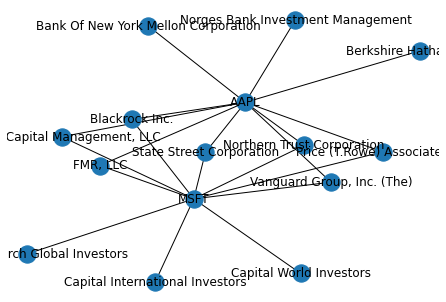

In [26]:
nx.draw(G, with_labels=True)